# **1. Установка библиотек и определение параметров звеньев**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

variant = 6

test_signal_duration = 100
dt = 0.0001
test_sig_ampl = 1 + variant * 0.1
test_sig_freq = (1 + variant * 3.5)
non_lin_param_1 = 0.5 + variant * 0.02
lin_param_k = 0.5 + variant * 0.3
lin_param_T = 0.1 + variant * 0.2

k = lin_param_k
T = lin_param_T
B = [ k/(1+T/dt) ]
A = [1, -1/(1+dt/T)]

print("Вариант номер {}".format(variant))
print("Период дискретизации сигнала: {:.2} с".format(dt))
print("Амплитуда тестового сигнала: {:.2}".format(test_sig_ampl))
print("Частота тестового сигнала: {:.2} Гц".format(test_sig_freq))
print("Длительность тестового сигнала: {} с".format(test_signal_duration))
print("Параметр нелинейностей 1: {:.2}".format(non_lin_param_1))
print("Коэффициент усиления линейного звена: {:.2}".format(lin_param_k))
print("Постоянная времени линейного звена: {:.2}".format(lin_param_T))

Вариант номер 6
Период дискретизации сигнала: 0.0001 с
Амплитуда тестового сигнала: 1.6
Частота тестового сигнала: 2.2e+01 Гц
Длительность тестового сигнала: 100 с
Параметр нелинейностей 1: 0.62
Коэффициент усиления линейного звена: 2.3
Постоянная времени линейного звена: 1.3


## **1.1. Формирование вектора времени**

In [ ]:
t = np.arange(0, test_signal_duration, dt)

print("Размерность массива: {}".format(t.shape))
print("Содержимое массива: {}".format(t))

Размерность массива: (1000000,)
Содержимое массива: [0.00000e+00 1.00000e-04 2.00000e-04 ... 9.99997e+01 9.99998e+01
 9.99999e+01]


# **2. Пробные сигналы**

## **2.1. Построение пробных сигналов**

In [ ]:
sig_sin = test_sig_ampl * np.sin(t * test_sig_freq * 2 * np.pi)
sig_meandr = test_sig_ampl * signal.square(t * test_sig_freq * 2 * np.pi)
sig_saw = test_sig_ampl * signal.sawtooth(t * test_sig_freq * 2 * np.pi)

print("Размерность синусоидального сигнала: {}".format(sig_sin.shape))
print("Содержимое массива синусоидального сигнала: {}".format(sig_sin))

print("\nРазмерность меандра: {}".format(sig_meandr.shape))
print("Содержимое массива меандра: {}".format(sig_meandr))

print("\nРазмерность полообразного сигнала: {}".format(sig_saw.shape))
print("Содержимое массива полообразного сигнала: {}".format(sig_saw))

Размерность синусоидального сигнала: (1000000,)
Содержимое массива синусоидального сигнала: [ 0.          0.02211611  0.04422799 ... -0.06633142 -0.04422799
 -0.02211611]

Размерность меандра: (1000000,)
Содержимое массива меандра: [ 1.6  1.6  1.6 ... -1.6 -1.6 -1.6]

Размерность полообразного сигнала: (1000000,)
Содержимое массива полообразного сигнала: [-1.6     -1.59296 -1.58592 ...  1.57888  1.58592  1.59296]


## **2.2. Посторение графиков спектров пробных сигналов**

In [ ]:
sig_sin_spec = np.abs(np.fft.fft(sig_sin))
sig_meandr_spec = np.abs(np.fft.fft(sig_meandr))
sig_saw_spec = np.abs(np.fft.fft(sig_saw))

print("Размерность массива спектра синусоидального сигнала: {}".format(sig_sin_spec.shape))
print("Содержимое массива спектра синусоидального сигнала: {}".format(sig_sin_spec))

print("\nРазмерность массива спектра меандра: {}".format(sig_meandr_spec.shape))
print("Содержимое массива спектра меандра: {}".format(sig_meandr_spec))

print("\nРазмерность массива спектра полообразного сигнала: {}".format(sig_saw_spec.shape))
print("Содержимое массива спектра полообразного сигнала: {}".format(sig_saw_spec))

Размерность массива спектра синусоидального сигнала: (1000000,)
Содержимое массива спектра синусоидального сигнала: [4.39751628e-11 1.69553425e-11 1.15925556e-11 ... 3.59507417e-11
 1.15925556e-11 1.69553425e-11]

Размерность массива спектра меандра: (1000000,)
Содержимое массива спектра меандра: [16.          8.80467554 12.22037003 ...  6.82225016 12.22037003
  8.80467554]

Размерность массива спектра полообразного сигнала: (1000000,)
Содержимое массива спектра полообразного сигнала: [243.19999983   8.19084404  37.75645098 ...  40.44740772  37.75645098
   8.19084404]


## **2.3. Построение графиков пробных сигналов и их спектров**

### **2.3.1. Синусоидальный сигнал**

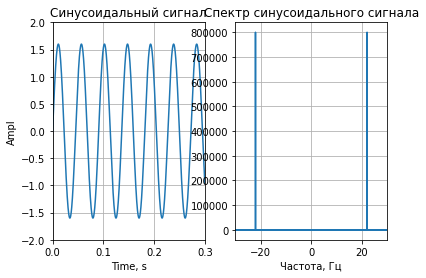

In [ ]:
plt.subplot(1, 2, 1).set(title='Синусоидальный сигнал')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_sin)

plt.subplot(1, 2, 2).set(title='Спектр синусоидального сигнала')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_sin_spec.shape[0], dt)
plt.plot(freqs, sig_sin_spec)

### **2.3.2. Меандр**

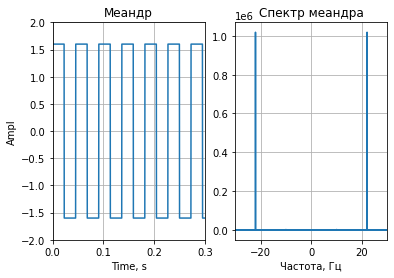

In [ ]:
plt.subplot(1, 2, 1).set(title='Меандр')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_meandr)

plt.subplot(1, 2, 2).set(title='Спектр меандра')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_meandr_spec.shape[0], dt)
plt.plot(freqs, sig_meandr_spec)

### **2.3.3. Пилообразный сигнал**

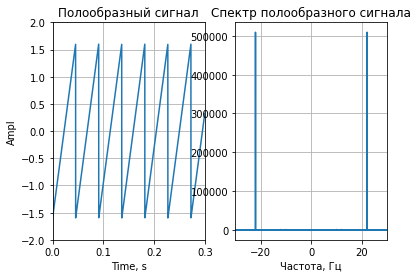

In [ ]:
plt.subplot(1, 2, 1).set(title='Полообразный сигнал')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_saw)

plt.subplot(1, 2, 2).set(title='Спектр полообразного сигнала')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_saw_spec.shape[0], dt)
plt.plot(freqs, sig_saw_spec)

# **3. Типовые нелинейные звенья**

## **3.1. Идеальное реле**

In [ ]:
relay = np.sign(x)

## **3.2. Мертвая зона**

In [ ]:
def dead_zone_scalar(x, width = 0.5):
    if np.abs(x)<width:
        return 0
    elif x>0:
        return x-width
    else:
        return x+width

dead_zone = np.vectorize(dead_zone_scalar, otypes=[np.float], excluded=['width'])

## **3.3. Насыщение**

In [ ]:
def saturation_scalar(x, hight = 0.5):
    if np.abs(x) < hight:
        return x
    elif x > 0:
        return hight
    else:
        return -hight

saturation = np.vectorize(saturation_scalar, otypes=[np.float])

# **4. Отклик типовых нелинейных звеньев на пробные сигналы**

## **4.1. Идеальное реле**

### **4.1.1. Для синусоидального сигнала**

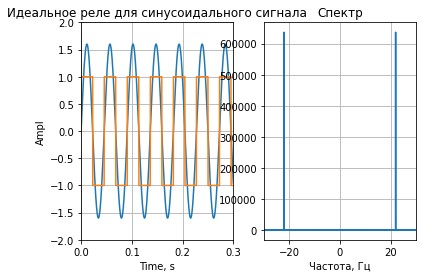

In [ ]:
sig_sin_after_relay = np.sign(sig_sin)
plt.subplot(1, 2, 1).set(title='Идеальное реле для синусоидального сигнала')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_sin, t, sig_sin_after_relay)

sig_sin_after_relay_spec = np.abs(np.fft.fft(sig_sin_after_relay))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_sin_after_relay_spec.shape[0], dt)
plt.plot(freqs, sig_sin_after_relay_spec)

### **4.1.2. Для меандра**

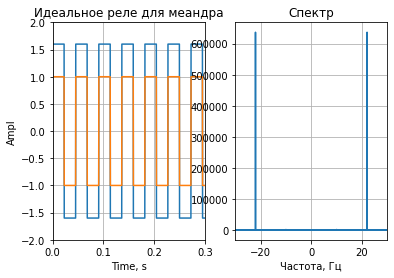

In [ ]:
sig_meandr_after_relay = np.sign(sig_meandr)
plt.subplot(1, 2, 1).set(title='Идеальное реле для меандра')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_meandr, t, sig_meandr_after_relay)

sig_meandr_after_relay_spec = np.abs(np.fft.fft(sig_meandr_after_relay))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_meandr_after_relay_spec.shape[0], dt)
plt.plot(freqs, sig_meandr_after_relay_spec)

### **4.1.3. Для пилообразного сигнала**

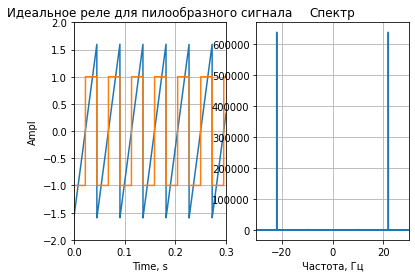

In [ ]:
sig_saw_after_relay = np.sign(sig_saw)
plt.subplot(1, 2, 1).set(title='Идеальное реле для пилообразного сигнала')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_saw, t, sig_saw_after_relay)

sig_saw_after_relay_spec = np.abs(np.fft.fft(sig_saw_after_relay))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_saw_after_relay_spec.shape[0], dt)
plt.plot(freqs, sig_saw_after_relay_spec)

## **4.2. Мертвая зона**

### **4.2.1. Для синусоидального сигнала**

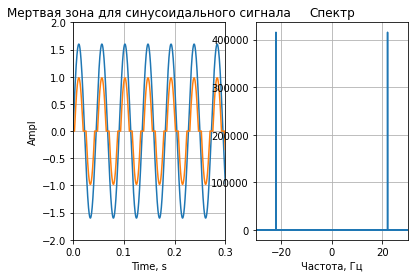

In [ ]:
sig_sin_dz = dead_zone(sig_sin, non_lin_param_1)
plt.subplot(1, 2, 1).set(title='Мертвая зона для синусоидального сигнала')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_sin, t, sig_sin_dz)

sig_sin_dz_spec = np.abs(np.fft.fft(sig_sin_dz))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_sin_dz_spec.shape[0], dt)
plt.plot(freqs, sig_sin_dz_spec)

### **4.2.2. Для меандра**

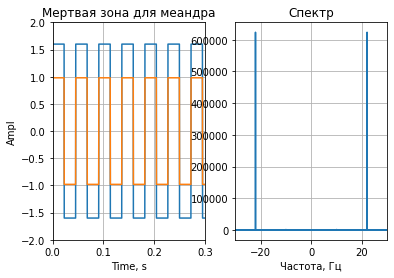

In [ ]:
sig_meandr_dz = dead_zone(sig_meandr, non_lin_param_1)
plt.subplot(1, 2, 1).set(title='Мертвая зона для меандра')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_meandr, t, sig_meandr_dz)

sig_meandr_dz_spec = np.abs(np.fft.fft(sig_meandr_dz))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_meandr_dz_spec.shape[0], dt)
plt.plot(freqs, sig_meandr_dz_spec)

### **4.2.3. Для пилообразного сигнала**

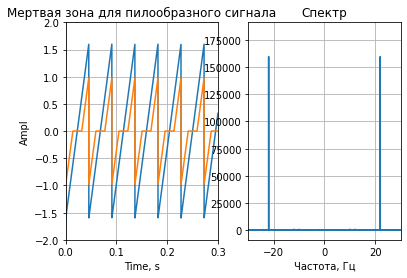

In [ ]:
sig_saw_dz = dead_zone(sig_saw, non_lin_param_1)
plt.subplot(1, 2, 1).set(title='Мертвая зона для пилообразного сигнала')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_saw, t, sig_saw_dz)

sig_saw_dz_spec = np.abs(np.fft.fft(sig_saw_dz))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_saw_dz_spec.shape[0], dt)
plt.plot(freqs, sig_saw_dz_spec)

## **4.3. Насыщение**

### **4.3.1. Для синусоидального сигнала**

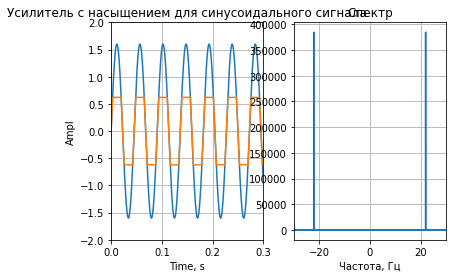

In [ ]:
sig_sin_after_saturation = saturation(sig_sin, non_lin_param_1)
plt.subplot(1, 2, 1).set(title='Усилитель с насыщением для синусоидального сигнала')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_sin, t, sig_sin_after_saturation)

sig_sin_after_saturation_spec = np.abs(np.fft.fft(sig_sin_after_saturation))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_sin_after_saturation_spec.shape[0], dt)
plt.plot(freqs, sig_sin_after_saturation_spec)

### **4.3.2. Для меандра**

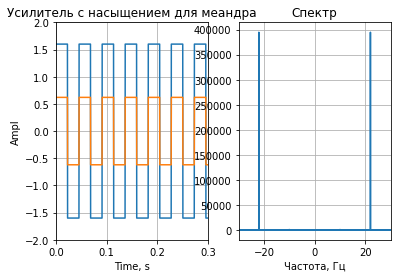

In [ ]:
sig_meandr_after_saturation = saturation(sig_meandr, non_lin_param_1)
plt.subplot(1, 2, 1).set(title='Усилитель с насыщением для меандра')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_meandr, t, sig_meandr_after_saturation)

sig_meandr_after_saturation_spec = np.abs(np.fft.fft(sig_meandr_after_saturation))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_meandr_after_saturation_spec.shape[0], dt)
plt.plot(freqs, sig_meandr_after_saturation_spec)

### **4.3.3. Для пилообразного сигнала**

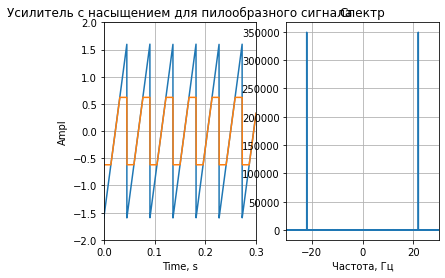

In [ ]:
sig_saw_after_saturation = saturation(sig_saw, non_lin_param_1)
plt.subplot(1, 2, 1).set(title='Усилитель с насыщением для пилообразного сигнала')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_saw, t, sig_saw_after_saturation)

sig_saw_after_saturation_spec = np.abs(np.fft.fft(sig_saw_after_saturation))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_saw_after_saturation_spec.shape[0], dt)
plt.plot(freqs, sig_saw_after_saturation_spec)

# **5. Отклик линейного звена на преобразованный сигнал НЭ-ЛЗ**

## **5.1. Идеальное реле**

### **5.1.1. Для синусоидального сигнала**

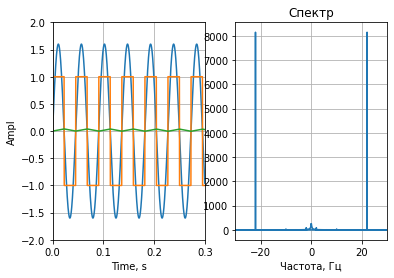

In [ ]:
sig_sin_after_relay_lb = signal.lfilter(B, A, sig_sin_after_relay)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_sin, t, sig_sin_after_relay, t, sig_sin_after_relay_lb)

sig_sin_after_relay_lb_spec = np.abs(np.fft.fft(sig_sin_after_relay_lb))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)#2
freqs = np.fft.fftfreq(sig_sin_after_relay_lb_spec.shape[0], dt)
plt.plot(freqs, sig_sin_after_relay_lb_spec)

### **5.1.2. Для меандра**

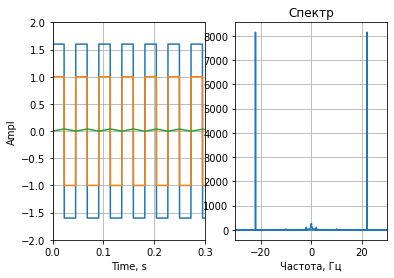

In [ ]:
sig_meandr_after_relay_lb = signal.lfilter(B, A, sig_meandr_after_relay)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_meandr, t, sig_meandr_after_relay, t, sig_meandr_after_relay_lb)

sig_meandr_after_relay_lb_spec = np.abs(np.fft.fft(sig_meandr_after_relay_lb))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)#2
freqs = np.fft.fftfreq(sig_meandr_after_relay_lb_spec.shape[0], dt)
plt.plot(freqs, sig_meandr_after_relay_lb_spec)

### **5.1.3. Для пилообразного сигнала**

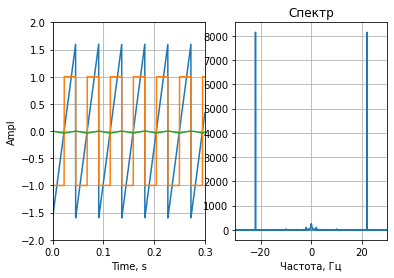

In [ ]:
sig_saw_after_relay_lb = signal.lfilter(B, A, sig_saw_after_relay)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_saw, t, sig_saw_after_relay, t, sig_saw_after_relay_lb)

sig_saw_after_relay_lb_spec = np.abs(np.fft.fft(sig_saw_after_relay_lb))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)#2
freqs = np.fft.fftfreq(sig_saw_after_relay_lb_spec.shape[0], dt)
plt.plot(freqs, sig_saw_after_relay_lb_spec)

## **5.2. Мертвая зона**

### **5.2.1. Для синусоидального сигнала**

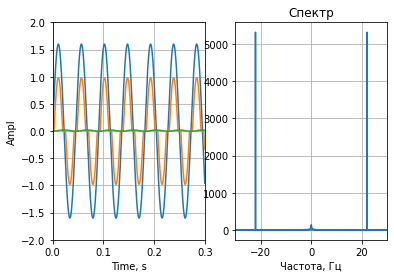

In [ ]:
sig_sin_dz_lb = signal.lfilter(B, A, sig_sin_dz)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_sin, t, sig_sin_dz, t, sig_sin_dz_lb)

sig_sin_dz_lb_spec = np.abs(np.fft.fft(sig_sin_dz_lb))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_sin_dz_lb_spec.shape[0], dt)
plt.plot(freqs, sig_sin_dz_lb_spec)

### **5.2.2. Для меандра**

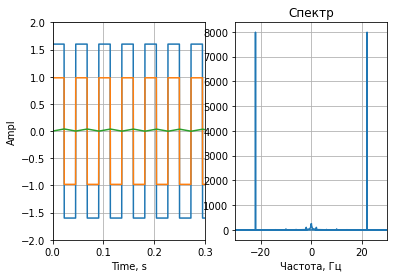

In [ ]:
sig_meandr_dz_lb = signal.lfilter(B, A, sig_meandr_dz)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_meandr, t, sig_meandr_dz, t, sig_meandr_dz_lb)

sig_meandr_dz_lb_spec = np.abs(np.fft.fft(sig_meandr_dz_lb))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)#2
freqs = np.fft.fftfreq(sig_meandr_dz_lb_spec.shape[0], dt)
plt.plot(freqs, sig_meandr_dz_lb_spec)

### **5.2.3. Для пилообразного сигнала**

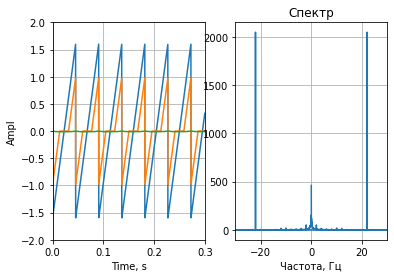

In [ ]:
sig_saw_dz_lb = signal.lfilter(B, A, sig_saw_dz)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_saw, t, sig_saw_dz, t, sig_saw_dz_lb)

sig_saw_dz_lb_spec = np.abs(np.fft.fft(sig_saw_dz_lb))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_saw_dz_lb_spec.shape[0], dt)
plt.plot(freqs, sig_saw_dz_lb_spec)

## **5.3. Насыщение**

### **5.3.1. Для синусоидального сигнала**

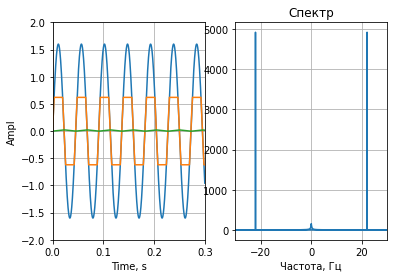

In [ ]:
sig_sin_after_saturation_lb = signal.lfilter(B, A, sig_sin_after_saturation)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_sin, t, sig_sin_after_saturation, t, sig_sin_after_saturation_lb)

sig_sin_after_saturation_lb_spec = np.abs(np.fft.fft(sig_sin_after_saturation_lb))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_sin_after_saturation_lb_spec.shape[0], dt)
plt.plot(freqs, sig_sin_after_saturation_lb_spec)

### **5.3.2. Для меандра**

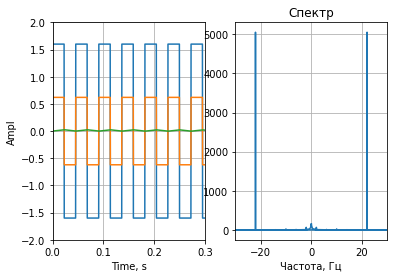

In [ ]:
sig_meandr_after_saturation_lb = signal.lfilter(B, A, sig_meandr_after_saturation)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_meandr, t, sig_meandr_after_saturation, t, sig_meandr_after_saturation_lb)

sig_meandr_after_saturation_lb_spec = np.abs(np.fft.fft(sig_meandr_after_saturation_lb))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)#2
freqs = np.fft.fftfreq(sig_meandr_after_saturation_lb_spec.shape[0], dt)
plt.plot(freqs, sig_meandr_after_saturation_lb_spec)

### **5.3.3. Для пилообразного сигнала**

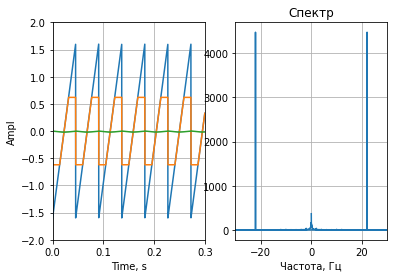

In [ ]:
sig_saw_after_saturation_lb = signal.lfilter(B, A, sig_saw_after_saturation)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_saw, t, sig_saw_after_saturation, t, sig_saw_after_saturation_lb)

sig_saw_after_saturation_lb_spec = np.abs(np.fft.fft(sig_saw_after_saturation_lb))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_saw_after_saturation_lb_spec.shape[0], dt)
plt.plot(freqs, sig_saw_after_saturation_lb_spec)

# **6. Отклик линейного звена на пробные сигналы**

## **6.1. Синусоидальный сигнал**

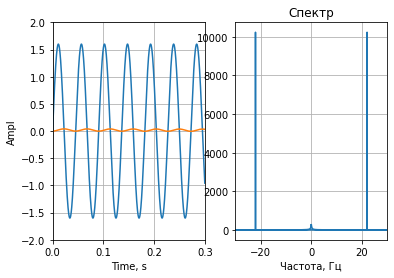

In [ ]:
sig_sin_lb = signal.lfilter(B, A, sig_sin)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_sin, t, sig_sin_lb)

sig_sin_lb_spec = np.abs(np.fft.fft(sig_sin_lb))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_sin_lb_spec.shape[0], dt)
plt.plot(freqs, sig_sin_lb_spec)

## **6.2. Меандр**

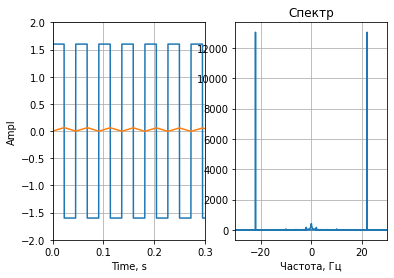

In [ ]:
sig_meandr_lb = signal.lfilter(B, A, sig_meandr)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_meandr, t, sig_meandr_lb)

sig_meandr_lb_spec = np.abs(np.fft.fft(sig_meandr_lb))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)#2
freqs = np.fft.fftfreq(sig_meandr_lb_spec.shape[0], dt)
plt.plot(freqs, sig_meandr_lb_spec)

## **6.3. Пилообразный сигнал**

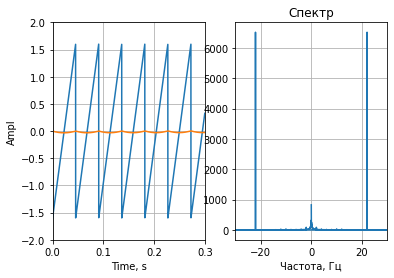

In [ ]:
sig_saw_lb = signal.lfilter(B, A, sig_saw)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_saw, t, sig_saw_lb)

sig_saw_lb_spec = np.abs(np.fft.fft(sig_saw_lb))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_saw_lb_spec.shape[0], dt)
plt.plot(freqs, sig_saw_lb_spec)

# **7. Отклик нелинейного элемента на преобразованный сигнал ЛЗ-НЭ**

## **7.1. Идеальное реле**

### **7.1.1. Для синусоидального сигнала**

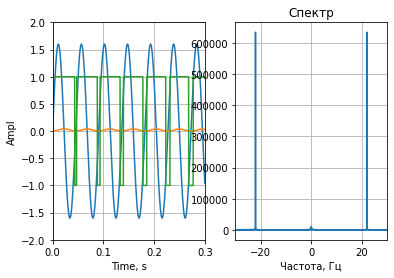

In [ ]:
sig_sin_lb_after_relay = np.sign(sig_sin_lb)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_sin, t, sig_sin_lb, t, sig_sin_lb_after_relay)

sig_sin_lb_after_relay_spec = np.abs(np.fft.fft(sig_sin_lb_after_relay))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_sin_lb_after_relay_spec.shape[0], dt)
plt.plot(freqs, sig_sin_lb_after_relay_spec)

### **7.1.2. Для меандра**

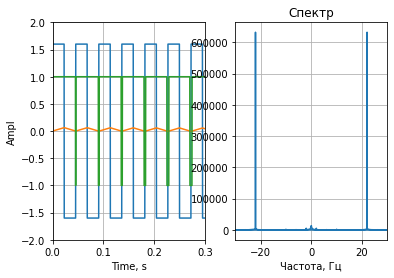

In [ ]:
sig_meandr_lb_after_relay = np.sign(sig_meandr_lb)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_meandr, t, sig_meandr_lb, t, sig_meandr_lb_after_relay)

sig_meandr_lb_after_relay_spec = np.abs(np.fft.fft(sig_meandr_lb_after_relay))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)#2
freqs = np.fft.fftfreq(sig_meandr_lb_after_relay_spec.shape[0], dt)
plt.plot(freqs, sig_meandr_lb_after_relay_spec)

### **7.1.3. Для пилообразного сигнала**

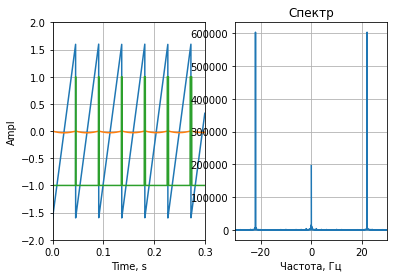

In [ ]:
sig_saw_lb_after_relay = np.sign(sig_saw_lb)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_saw, t, sig_saw_lb, t, sig_saw_lb_after_relay)

sig_saw_lb_after_relay_spec = np.abs(np.fft.fft(sig_saw_lb_after_relay))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_saw_lb_after_relay_spec.shape[0], dt)
plt.plot(freqs, sig_saw_lb_after_relay_spec)

## **7.2. Мертвая зона**

### **7.2.1. Для синусоидального сигнала**

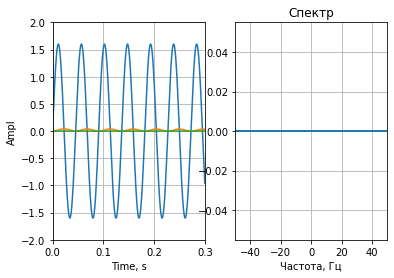

In [ ]:
sig_sin_lb_dz = dead_zone(sig_sin_lb, non_lin_param_1)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_sin, t, sig_sin_lb, t, sig_sin_lb_dz)

sig_sin_lb_dz_spec = np.abs(np.fft.fft(sig_sin_lb_dz))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-50, 50)
freqs = np.fft.fftfreq(sig_sin_lb_dz_spec.shape[0], dt)
plt.plot(freqs, sig_sin_lb_dz_spec)

### **7.2.2. Для меандра**

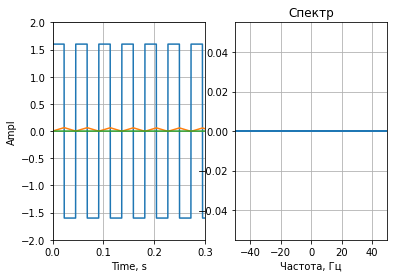

In [ ]:
sig_meandr_lb_dz = dead_zone(sig_meandr_lb, non_lin_param_1)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_meandr, t, sig_meandr_lb, t, sig_meandr_lb_dz)

sig_meandr_lb_dz_spec = np.abs(np.fft.fft(sig_meandr_lb_dz))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-50, 50)
freqs = np.fft.fftfreq(sig_meandr_lb_dz_spec.shape[0], dt)
plt.plot(freqs, sig_meandr_lb_dz_spec)

### **7.2.3. Для пилообразного сигнала**

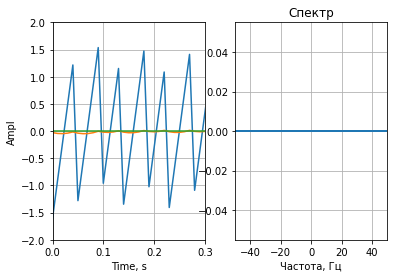

In [ ]:
sig_saw_lb_dz = dead_zone(sig_saw_lb, non_lin_param_1)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_saw, t, sig_saw_lb, t, sig_saw_lb_dz)

sig_saw_lb_dz_spec = np.abs(np.fft.fft(sig_saw_lb_dz))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-50, 50)
freqs = np.fft.fftfreq(sig_saw_lb_dz_spec.shape[0], dt)
plt.plot(freqs, sig_saw_lb_dz_spec)

## **7.3. Насыщение**

### **7.3.1. Для синусоидального сигнала**

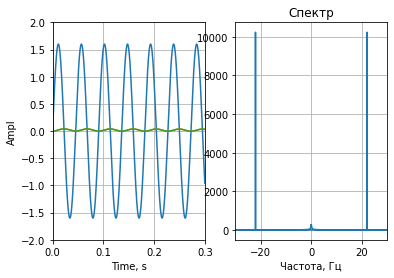

In [ ]:
sig_sin_lb_after_saturation = saturation(sig_sin_lb, non_lin_param_1)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_sin, t, sig_sin_lb, t, sig_sin_lb_after_saturation)

sig_sin_lb_after_saturation_spec = np.abs(np.fft.fft(sig_sin_lb_after_saturation))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_sin_lb_after_saturation_spec.shape[0], dt)
plt.plot(freqs, sig_sin_lb_after_saturation_spec)

### **7.3.2. Для меандра**

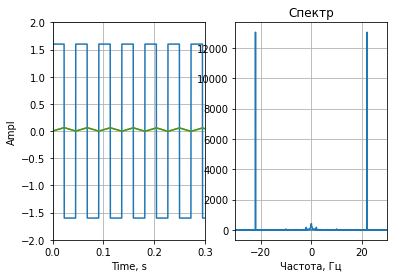

In [ ]:
sig_meandr_lb_after_saturation = saturation(sig_meandr_lb, non_lin_param_1)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_meandr, t, sig_meandr_lb, t, sig_meandr_lb_after_saturation)

sig_meandr_lb_after_saturation_spec = np.abs(np.fft.fft(sig_meandr_lb_after_saturation))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)#2
freqs = np.fft.fftfreq(sig_meandr_lb_after_saturation_spec.shape[0], dt)
plt.plot(freqs, sig_meandr_lb_after_saturation_spec)

### **7.3.3. Для пилообразного сигнала**

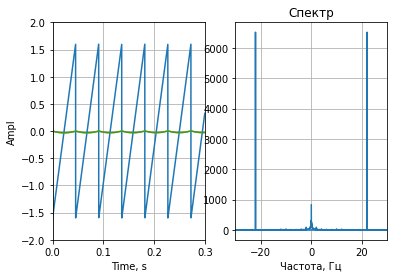

In [ ]:
sig_saw_lb_after_saturation = saturation(sig_saw_lb, non_lin_param_1)
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-2, 2)
plt.xlim(0, .3)
plt.plot(t, sig_saw, t, sig_saw_lb, t, sig_saw_lb_after_saturation)

sig_saw_lb_after_saturation_spec = np.abs(np.fft.fft(sig_saw_lb_after_saturation))

plt.subplot(1, 2, 2).set(title='Спектр')
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-30, 30)
freqs = np.fft.fftfreq(sig_saw_lb_after_saturation_spec.shape[0], dt)
plt.plot(freqs, sig_saw_lb_after_saturation_spec)